In [272]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft, fftfreq, fftshift

In [273]:
def V_p(x):

    return np.zeros(len(x)) # Voor infinite square well

In [274]:
def Schroedinger(x, dx):

    main = 1/(dx**2) + V_p(x)[1:-1]
    off = -1/(2*dx**2) * np.ones(len(main)-1) # lengte van de nevendiagonalen = lengte van hoofd - 1

    E, psi = eigh_tridiagonal(main, off) # psi word uitgegeven als een matrix waarbij elke kolomn een eigenvector is.

    return E, psi.T # psi wordt dmv psi.T getransponeerd, zodat elke vector 1 rij wordt.
                    # dit hoef je niet te doen maar ik vind het makkelijker met de syntex voor het plotten

In [275]:
class Wave_packet:

    def __init__(self, N, dt, sigma0=5.0, k0=1.0, x0=-150.0, x_begin=-200.0,
                x_end=200.0, barrier_height=1.0, barrier_width=3.0):
        
        self.N = N
        self.dt = dt
        self.sigma0 = sigma0
        self.k0 = k0
        self.x0 = x0
        self.x_begin = x_begin
        self.x_end = x_end
        self.barrier_height = barrier_height
        self.barrier_width = barrier_width

        self.x, self.dx = np.linspace(self.x_begin, self.x_end, self.N, retstep=True)

        norm = (2.0 * np.pi * self.sigma0**2)**(-0.25)

        self.psi = norm * np.exp(-(self.x - self.x0)**2 / (4.0 * self.sigma0**2))*np.exp(1.0j * self.k0 * self.x)

In [276]:
sigma = [0.1, 1, 10, 20, 100]

In [277]:
k = fftfreq(500, 1/0.5)
k = fftshift(k)
packets = []
psi_ks = []
for i in sigma:
    packet = Wave_packet(sigma0 = i, N=500, dt=0.5, x0 = 0, k0=0, barrier_width=1, barrier_height = 10)
    packets.append(packet)

    psi_k = fft(packet.psi)
    psi_k = fftshift(psi_k)
    psi_ks.append(psi_k)
    


In [278]:
k

array([-0.25 , -0.249, -0.248, -0.247, -0.246, -0.245, -0.244, -0.243,
       -0.242, -0.241, -0.24 , -0.239, -0.238, -0.237, -0.236, -0.235,
       -0.234, -0.233, -0.232, -0.231, -0.23 , -0.229, -0.228, -0.227,
       -0.226, -0.225, -0.224, -0.223, -0.222, -0.221, -0.22 , -0.219,
       -0.218, -0.217, -0.216, -0.215, -0.214, -0.213, -0.212, -0.211,
       -0.21 , -0.209, -0.208, -0.207, -0.206, -0.205, -0.204, -0.203,
       -0.202, -0.201, -0.2  , -0.199, -0.198, -0.197, -0.196, -0.195,
       -0.194, -0.193, -0.192, -0.191, -0.19 , -0.189, -0.188, -0.187,
       -0.186, -0.185, -0.184, -0.183, -0.182, -0.181, -0.18 , -0.179,
       -0.178, -0.177, -0.176, -0.175, -0.174, -0.173, -0.172, -0.171,
       -0.17 , -0.169, -0.168, -0.167, -0.166, -0.165, -0.164, -0.163,
       -0.162, -0.161, -0.16 , -0.159, -0.158, -0.157, -0.156, -0.155,
       -0.154, -0.153, -0.152, -0.151, -0.15 , -0.149, -0.148, -0.147,
       -0.146, -0.145, -0.144, -0.143, -0.142, -0.141, -0.14 , -0.139,
      

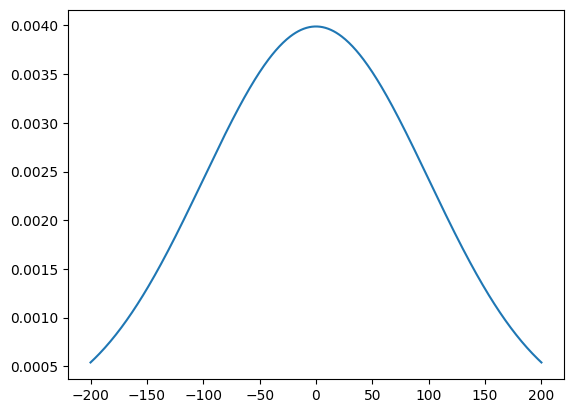

In [281]:
plt.plot(packets[i].x, np.abs(packets[i].psi)**2)

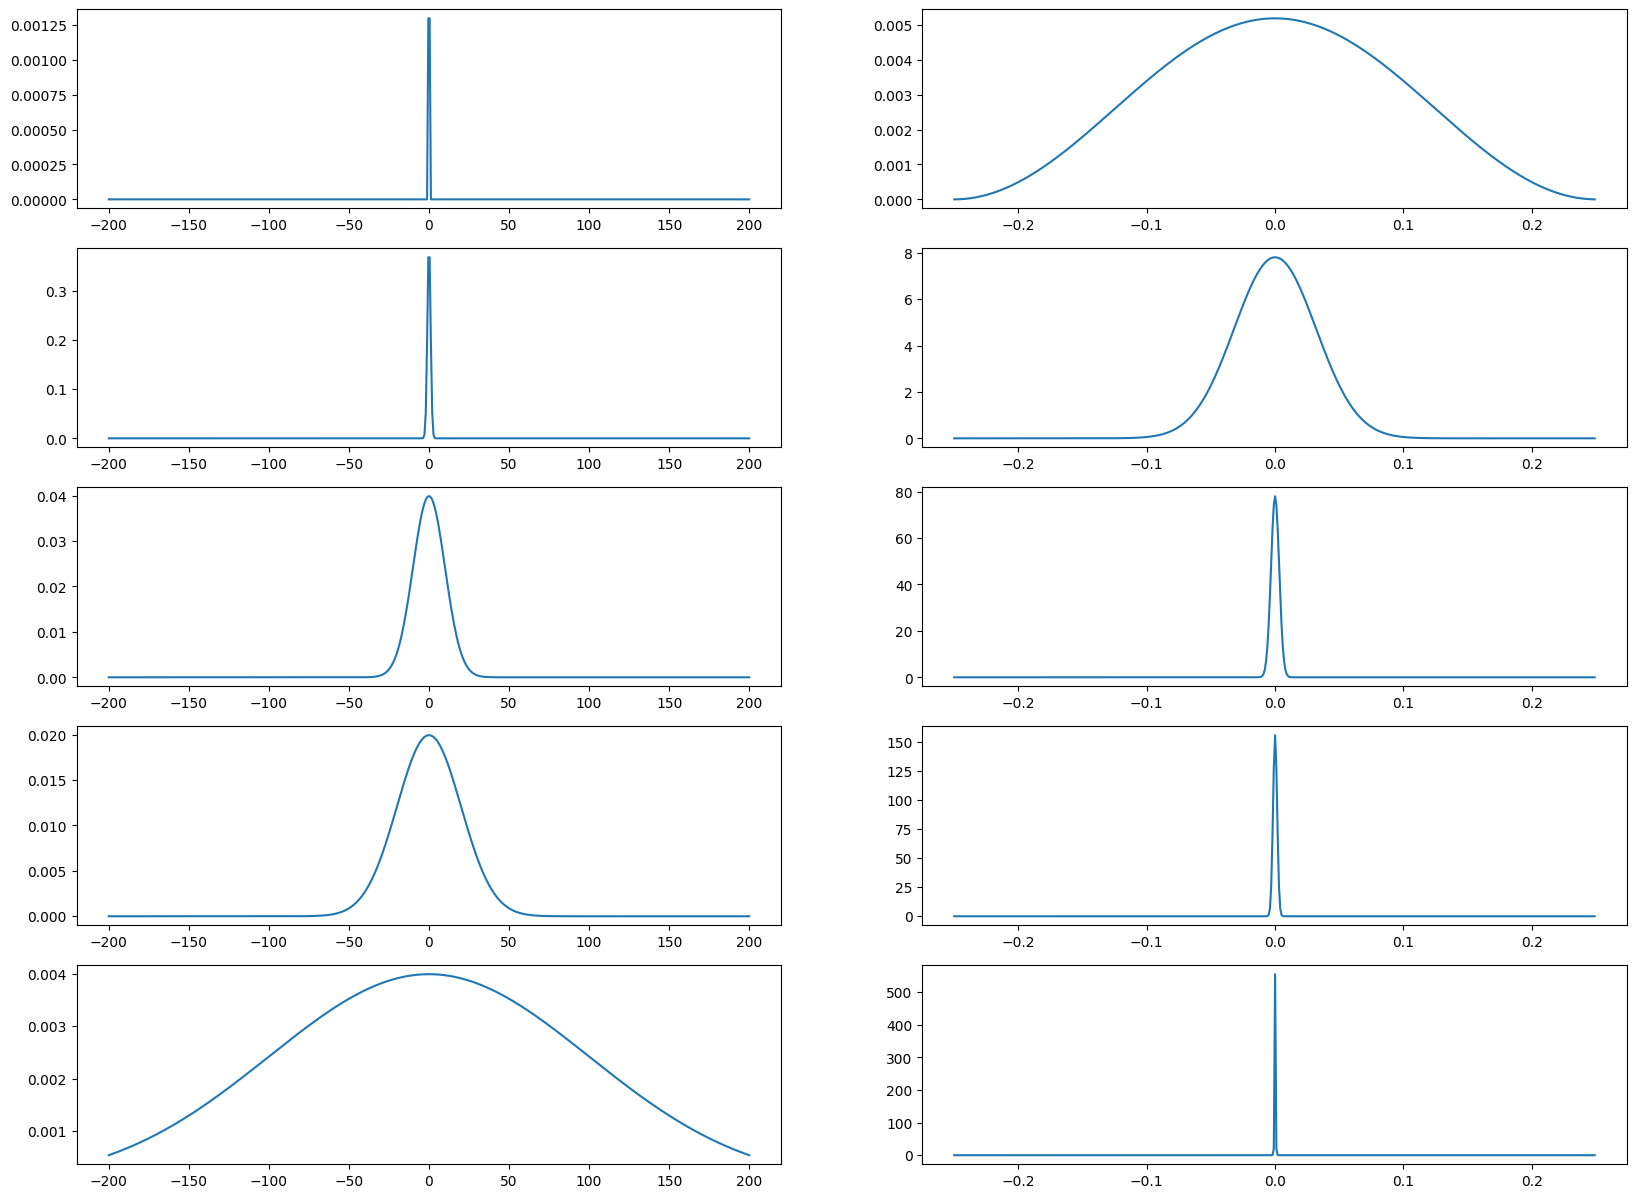

In [283]:
fig, ax = plt.subplots(5,2, figsize=(20, 15))

for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.plot(packets[i].x, np.abs(packets[i].psi)**2)

    plt.subplot(5,2,2*i+2)
    plt.plot(k, np.abs(psi_ks[i])**2)

plt.show()